## Section 1 : Financial Data Cleaning:

1. Importing financial data into Python
2. Handling missing data and outliers
3. Data preprocessing techniques (e.g., data normalization, standardization)
4. Dealing with data duplicates and inconsistencies
5. Time series data handling and alignment


In [48]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
pip install plotly mplfinance seaborn ydata-profiling ta pygwalker jaal

In [56]:
# Define the ticker symbol and time period
ticker = "AAPL"
start_date = "2019-01-01"
end_date = "2021-12-31"

# Fetch the data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [57]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   38.722500   39.712502   38.557499   39.480000   37.994488   
2019-01-03   35.994999   36.430000   35.500000   35.547501   34.209961   
2019-01-04   36.132500   37.137501   35.950001   37.064999   35.670361   
2019-01-07   37.174999   37.207500   36.474998   36.982498   35.590969   
2019-01-08   37.389999   37.955002   37.130001   37.687500   36.269440   
...                ...         ...         ...         ...         ...   
2021-12-23  175.850006  176.850006  175.270004  176.279999  174.753906   
2021-12-27  177.089996  180.419998  177.070007  180.330002  178.768845   
2021-12-28  180.160004  181.330002  178.529999  179.289993  177.737854   
2021-12-29  179.330002  180.630005  178.139999  179.380005  177.827057   
2021-12-30  179.470001  180.570007  178.089996  178.199997  176.657272   

               Volume  
Date                   
2019-01-02  148158800  
2019-01-03  365248800  
2019-01-04  234428400  
2019-01-07  219111200  
2019-01-08  164101200  
...               ...  
2021-12-23   68356600  
2021-12-27   74919600  
2021-12-28   79144300  
2021-12-29   62348900  
2021-12-30   59773000  

[756 rows x 6 columns]

In [50]:
data_multiple = yf.download('AAPL GOOG RELIANCE.NS', start=start_date, end=end_date)

[*********************100%***********************]  3 of 3 completed


In [51]:
data_multiple.head()

Adj Close                              Close             \
                 AAPL       GOOG  RELIANCE.NS       AAPL       GOOG   
Date                                                                  
2019-01-01        NaN        NaN  1093.407104        NaN        NaN   
2019-01-02  37.994488  52.292500  1079.166260  39.480000  52.292500   
2019-01-03  34.209957  50.803001  1065.852417  35.547501  50.803001   
2019-01-04  35.670357  53.535500  1071.607178  37.064999  53.535500   
2019-01-07  35.590961  53.419498  1077.557007  36.982498  53.419498   

                              High                                Low  \
            RELIANCE.NS       AAPL       GOOG  RELIANCE.NS       AAPL   
Date                                                                    
2019-01-01  1110.473877        NaN        NaN  1116.714722        NaN   
2019-01-02  1096.010864  39.712502  52.616001  1116.417480  38.557499   
2019-01-03  1082.489136  36.430000  52.848999  1104.133911  35.500000   
2019-01-04  1088.333740  37.137501  53.542000  1094.079224  35.950001   
2019-01-07  1094.376465  37.207500  53.700001  1107.947754  36.474998   

                                         Open                          \
                 GOOG  RELIANCE.NS       AAPL       GOOG  RELIANCE.NS   
Date                                                                    
2019-01-01        NaN  1099.676147        NaN        NaN  1114.683960   
2019-01-02  50.785500  1090.661621  38.722500  50.828499  1104.034912   
2019-01-03  50.703499  1079.864014  35.994999  52.049999  1097.100586   
2019-01-04  51.370899  1070.948486  36.132500  51.629501  1087.095459   
2019-01-07  52.737999  1090.661621  37.174999  53.575001  1096.605225   

                 Volume                          
                   AAPL        GOOG RELIANCE.NS  
Date                                             
2019-01-01          NaN         NaN   4498087.0  
2019-01-02  148158800.0  30652000.0   7212697.0  
2019-01-03  365248800.0  36822000.0   7517041.0  
2019-01-04  234428400.0  41878000.0   8545382.0  
2019-01-07  219111200.0  39638000.0   5565822.0

In [52]:
data_multiple.isna().sum()

Adj Close  AAPL           22
           GOOG           22
           RELIANCE.NS    37
Close      AAPL           22
           GOOG           22
           RELIANCE.NS    37
High       AAPL           22
           GOOG           22
           RELIANCE.NS    37
Low        AAPL           22
           GOOG           22
           RELIANCE.NS    37
Open       AAPL           22
           GOOG           22
           RELIANCE.NS    37
Volume     AAPL           22
           GOOG           22
           RELIANCE.NS    37
dtype: int64

In [53]:
data_multiple.fillna(0)

data_multiple.fillna(method='ffill')

Adj Close                                Close              \
                  AAPL        GOOG  RELIANCE.NS        AAPL        GOOG   
Date                                                                      
2019-01-01         NaN         NaN  1093.407104         NaN         NaN   
2019-01-02   37.994488   52.292500  1079.166260   39.480000   52.292500   
2019-01-03   34.209957   50.803001  1065.852417   35.547501   50.803001   
2019-01-04   35.670357   53.535500  1071.607178   37.064999   53.535500   
2019-01-07   35.590961   53.419498  1077.557007   36.982498   53.419498   
...                ...         ...          ...         ...         ...   
2021-12-24  174.753922  147.142502  2365.677734  176.279999  147.142502   
2021-12-27  178.768845  148.063995  2363.135254  180.330002  148.063995   
2021-12-28  177.737839  146.447998  2391.200684  179.289993  146.447998   
2021-12-29  177.827072  146.504501  2395.288330  179.380005  146.504501   
2021-12-30  176.657272  146.002502  2352.018799  178.199997  146.002502   

                               High                                  Low  \
            RELIANCE.NS        AAPL        GOOG  RELIANCE.NS        AAPL   
Date                                                                       
2019-01-01  1110.473877         NaN         NaN  1116.714722         NaN   
2019-01-02  1096.010864   39.712502   52.616001  1116.417480   38.557499   
2019-01-03  1082.489136   36.430000   52.848999  1104.133911   35.500000   
2019-01-04  1088.333740   37.137501   53.542000  1094.079224   35.950001   
2019-01-07  1094.376465   37.207500   53.700001  1107.947754   36.474998   
...                 ...         ...         ...          ...         ...   
2021-12-24  2372.800049  176.850006  148.572601  2392.000000  175.270004   
2021-12-27  2370.250000  180.419998  148.426498  2378.000000  177.070007   
2021-12-28  2398.399902  181.330002  148.374496  2404.850098  178.529999   
2021-12-29  2402.500000  180.630005  147.183746  2419.000000  178.139999   
2021-12-30  2359.100098  180.570007  147.062500  2404.949951  178.089996   

                                           Open                           \
                  GOOG  RELIANCE.NS        AAPL        GOOG  RELIANCE.NS   
Date                                                                       
2019-01-01         NaN  1099.676147         NaN         NaN  1114.683960   
2019-01-02   50.785500  1090.661621   38.722500   50.828499  1104.034912   
2019-01-03   50.703499  1079.864014   35.994999   52.049999  1097.100586   
2019-01-04   51.370899  1070.948486   36.132500   51.629501  1087.095459   
2019-01-07   52.737999  1090.661621   37.174999   53.575001  1096.605225   
...                ...          ...         ...         ...          ...   
2021-12-24  146.950851  2337.550049  175.850006  147.089493  2370.000000   
2021-12-27  147.250000  2348.100098  177.089996  147.463501  2361.550049   
2021-12-28  145.935501  2373.050049  180.160004  148.374496  2375.600098   
2021-12-29  145.504501  2382.100098  179.330002  146.429504  2391.000000   
2021-12-30  145.758499  2345.600098  179.470001  146.449997  2400.000000   

                 Volume                          
                   AAPL        GOOG RELIANCE.NS  
Date                                             
2019-01-01          NaN         NaN   4498087.0  
2019-01-02  148158800.0  30652000.0   7212697.0  
2019-01-03  365248800.0  36822000.0   7517041.0  
2019-01-04  234428400.0  41878000.0   8545382.0  
2019-01-07  219111200.0  39638000.0   5565822.0  
...                 ...         ...         ...  
2021-12-24   68356600.0  13818000.0   3639616.0  
2021-12-27   74919600.0  13256000.0   1853948.0  
2021-12-28   79144300.0  18624000.0   2941883.0  
2021-12-29   62348900.0  17022000.0   7118779.0  
2021-12-30   59773000.0  12978000.0  13537254.0  

[778 rows x 18 columns]

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
# Scale the 'Close' column between 0 and 1
scaler = MinMaxScaler()
data['Volume'] = scaler.fit_transform(data['Volume'].values.reshape(-1, 1))

In [59]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   38.722500   39.712502   38.557499   39.480000   37.994488   
2019-01-03   35.994999   36.430000   35.500000   35.547501   34.209961   
2019-01-04   36.132500   37.137501   35.950001   37.064999   35.670361   
2019-01-07   37.174999   37.207500   36.474998   36.982498   35.590969   
2019-01-08   37.389999   37.955002   37.130001   37.687500   36.269440   
...                ...         ...         ...         ...         ...   
2021-12-23  175.850006  176.850006  175.270004  176.279999  174.753906   
2021-12-27  177.089996  180.419998  177.070007  180.330002  178.768845   
2021-12-28  180.160004  181.330002  178.529999  179.289993  177.737854   
2021-12-29  179.330002  180.630005  178.139999  179.380005  177.827057   
2021-12-30  179.470001  180.570007  178.089996  178.199997  176.657272   

              Volume  
Date                  
2019-01-02  0.277966  
2019-01-03  0.841091  
2019-01-04  0.501747  
2019-01-07  0.462014  
2019-01-08  0.319320  
...              ...  
2021-12-23  0.070962  
2021-12-27  0.087986  
2021-12-28  0.098945  
2021-12-29  0.055378  
2021-12-30  0.048697  

[756 rows x 6 columns]

In [15]:
# Drop duplicate rows based on the index
data = data.drop_duplicates()

In [62]:
# Resample the data to monthly frequency
data_monthly = data.resample('M').mean()

In [63]:
data_monthly

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-31   38.402143   38.882619   37.986905   38.541548   37.091350   
2019-02-28   42.848027   43.220395   42.632895   42.931973   41.447228   
2019-03-31   45.805953   46.232976   45.352738   45.823453   44.288394   
2019-04-30   49.966666   50.394286   49.657738   50.129048   48.449758   
2019-05-31   47.734659   48.342386   47.301250   47.818409   46.333326   
2019-06-30   48.166125   48.699000   47.808250   48.242250   46.805721   
2019-07-31   51.262954   51.682386   50.978523   51.304091   49.776387   
2019-08-31   51.315568   51.902386   50.712386   51.239432   49.852050   
2019-09-30   54.431875   54.867750   53.984875   54.498750   53.076818   
2019-10-31   58.732391   59.242283   58.236304   58.821630   57.286910   
2019-11-30   65.423499   65.865375   65.060500   65.630126   64.072099   
2019-12-31   68.847857   69.470952   68.467024   69.131428   67.529849   
2020-01-31   77.792738   78.581547   77.207857   77.979048   76.172494   
2020-02-29   77.578421   78.813158   76.681579   77.817631   76.156356   
2020-03-31   65.268410   67.423181   63.711591   65.611023   64.243111   
2020-04-30   67.952857   68.945357   67.021072   68.096547   66.676815   
2020-05-31   77.221375   78.312875   76.595250   77.496376   76.036902   
2020-06-30   86.135341   87.336250   85.160681   86.451590   84.878318   
2020-07-31   95.417500   96.586818   94.265682   95.566250   93.827106   
2020-08-31  116.969881  118.565596  115.556666  117.299762  115.335444   
2020-09-30  116.079048  118.036190  112.584762  115.125237  113.233947   
2020-10-31  116.694090  118.274546  114.911363  116.413182  114.500734   
2020-11-30  116.748501  118.198999  115.410500  116.825999  115.066559   
2020-12-31  127.150455  128.608182  125.727726  127.290455  125.415316   
2021-01-31  133.101053  135.070003  130.978947  133.036842  131.077052   
2021-02-28  132.022631  133.066843  129.929473  131.531579  129.745735   
2021-03-31  122.087392  123.471739  120.404783  121.871304  120.255423   
2021-04-30  131.672382  132.911429  130.465239  131.812858  130.065163   
2021-05-31  127.035001  128.158000  125.823999  126.784000  125.272052   
2021-06-30  129.489546  130.651819  128.761364  129.958636  128.453346   
2021-07-31  144.570478  146.252383  143.538571  145.139524  143.458394   
2021-08-31  147.850909  149.225909  146.865454  148.177727  146.641339   
2021-09-30  149.001905  149.995239  147.220475  148.306190  146.808015   
2021-10-31  144.971428  146.418570  143.954761  145.563809  144.093331   
2021-11-30  153.603810  155.509048  152.586190  154.255716  152.878916   
2021-12-31  172.920476  175.460955  170.966667  173.361428  171.860602   

              Volume  
Date                  
2019-01-31  0.302796  
2019-02-28  0.151701  
2019-03-31  0.215290  
2019-04-30  0.143714  
2019-05-31  0.242397  
2019-06-30  0.160939  
2019-07-31  0.117130  
2019-08-31  0.214866  
2019-09-30  0.175128  
2019-10-31  0.168068  
2019-11-30  0.126239  
2019-12-31  0.188717  
2020-01-31  0.256107  
2020-02-29  0.305853  
2020-03-31  0.634115  
2020-04-30  0.296984  
2020-05-31  0.257573  
2020-06-30  0.276066  
2020-07-31  0.249762  
2020-08-31  0.396390  
2020-09-30  0.373561  
2020-10-31  0.234950  
2020-11-30  0.169007  
2020-12-31  0.167451  
2021-01-31  0.199498  
2021-02-28  0.144014  
2021-03-31  0.192565  
2021-04-30  0.127087  
2021-05-31  0.115682  
2021-06-30  0.083076  
2021-07-31  0.130691  
2021-08-31  0.065974  
2021-09-30  0.115720  
2021-10-31  0.086969  
2021-11-30  0.102527  
2021-12-31  0.187717

Datetime and Dateutil Module

In [64]:
from datetime import datetime, timedelta

# Creating a datetime object
dt = datetime(2023, 7, 16, 15, 30, 0)
formatted_dt = dt.strftime('%Y-%m-%d %H:%M:%S')
dt2 = datetime(2023, 7, 15, 12, 0, 0)

In [65]:
formatted_dt

'2023-07-16 15:30:00'

In [66]:
date_string = "2023-07-16 15:30:00"
dt = datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")
dt

datetime.datetime(2023, 7, 16, 15, 30)

In [23]:
dt = datetime(2023, 7, 16, 15, 30, 0)
dt_new = dt + timedelta(days=7, hours=3)

dt2 = datetime(2023, 7, 15, 12, 0, 0)
duration = dt - dt2
duration

datetime.timedelta(days=1, seconds=12600)

In [67]:
from dateutil.relativedelta import relativedelta
dt + relativedelta(days=5)

datetime.datetime(2023, 7, 21, 15, 30)

## Section 2 : Exploratory Data Analysis:

1. Descriptive statistics for financial data
2. Data aggregation and summarization
3. Correlation analysis and covariance
4. Profiling on any given data


In [69]:
data.describe()

Open        High         Low       Close   Adj Close      Volume
count  756.000000  756.000000  756.000000  756.000000  756.000000  756.000000
mean    95.922715   97.046621   94.874682   96.024716   94.422265    0.205428
std     39.575933   39.996301   39.121493   39.575394   39.514965    0.149319
min     35.994999   36.430000   35.500000   35.547501   34.209961    0.000000
25%     56.091250   56.490000   55.171248   55.968750   54.508466    0.107669
50%     91.264999   92.793751   90.738750   91.421249   89.757538    0.167953
75%    129.800003  131.307495  128.492504  130.247505  128.657330    0.255360
max    181.119995  182.130005  178.529999  180.330002  178.768845    1.000000

In [31]:
# Aggregate data by month and calculate average closing price
data.resample('M').agg({'Close': 'last'})

Close
Date                  
2019-01-31   41.610001
2019-02-28   43.287498
2019-03-31   47.487499
2019-04-30   50.167500
2019-05-31   43.767502
2019-06-30   49.480000
2019-07-31   53.259998
2019-08-31   52.185001
2019-09-30   55.992500
2019-10-31   62.189999
2019-11-30   66.812500
2019-12-31   73.412498
2020-01-31   77.377502
2020-02-29   68.339996
2020-03-31   63.572498
2020-04-30   73.449997
2020-05-31   79.485001
2020-06-30   91.199997
2020-07-31  106.260002
2020-08-31  129.039993
2020-09-30  115.809998
2020-10-31  108.860001
2020-11-30  119.050003
2020-12-31  132.690002
2021-01-31  131.960007
2021-02-28  121.260002
2021-03-31  122.150002
2021-04-30  131.460007
2021-05-31  124.610001
2021-06-30  136.960007
2021-07-31  145.860001
2021-08-31  151.830002
2021-09-30  141.500000
2021-10-31  149.800003
2021-11-30  165.300003
2021-12-31  178.199997

In [71]:
data_multiple.fillna(method='ffill', inplace = True)

In [73]:
data_multiple.fillna(method='bfill', inplace = True)

In [75]:
data_multiple.isna().sum()

Adj Close  AAPL           0
           GOOG           0
           RELIANCE.NS    0
Close      AAPL           0
           GOOG           0
           RELIANCE.NS    0
High       AAPL           0
           GOOG           0
           RELIANCE.NS    0
Low        AAPL           0
           GOOG           0
           RELIANCE.NS    0
Open       AAPL           0
           GOOG           0
           RELIANCE.NS    0
Volume     AAPL           0
           GOOG           0
           RELIANCE.NS    0
dtype: int64

In [76]:
correlation = data_multiple[['Close']].corr()

In [77]:
correlation

Close                      
                       AAPL      GOOG RELIANCE.NS
Close AAPL         1.000000  0.917257    0.933337
      GOOG         0.917257  1.000000    0.862192
      RELIANCE.NS  0.933337  0.862192    1.000000

Data Viz Libraries

1. matplotlib
2. seaborn
3. Plotly

<Axes: xlabel='None-None', ylabel='None-None'>

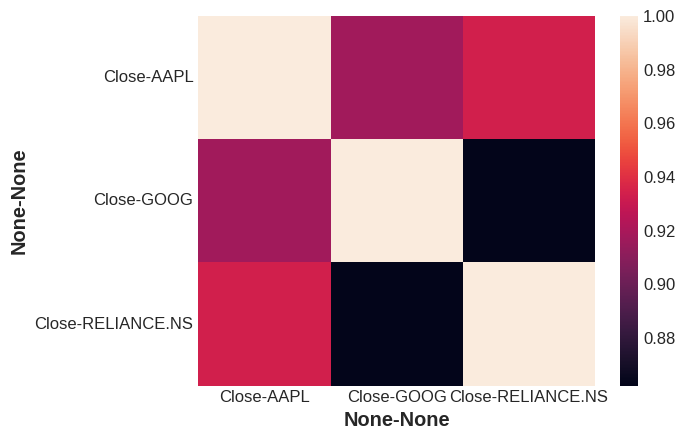

In [78]:
import seaborn as sns

sns.heatmap(correlation)

In [38]:
from ydata_profiling import ProfileReport

pr = ProfileReport(data,title='Profile Report')

In [39]:
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
pr.to_file("data_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Section 3 : Data Visualization for Financial Data:

1. Introduction to data visualization libraries in Python (e.g., Matplotlib, Seaborn)
2. Plotting time series data and financial charts (e.g., line plots, candlestick charts)
3. Visualizing statistical measures (e.g., histograms, box plots)
4. Heatmaps and correlation matrices
5. Interactive visualization using libraries like Plotly
6. Customizing and styling visualizations for finance

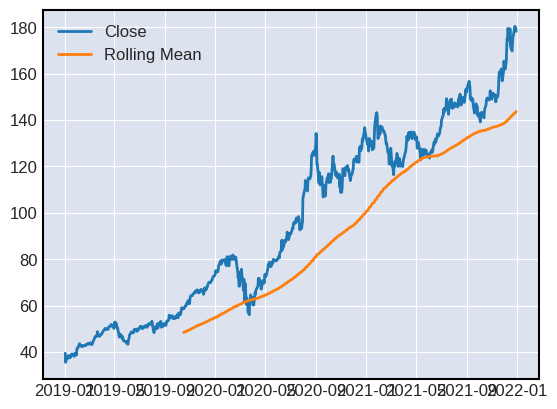

In [79]:
# Calculate rolling mean and standard deviation
data['RollingMean'] = data['Close'].rolling(window=200).mean()
data['RollingStd'] = data['Close'].rolling(window=30).std()

# Plotting the trend line
import matplotlib.pyplot as plt
plt.plot(data['Close'], label='Close')
plt.plot(data['RollingMean'], label='Rolling Mean')
plt.legend()
plt.show()


In [80]:
import ta

data['RSI14'] = ta.momentum.rsi(data['Close'], 14)
data['MA50']  = ta.trend.sma_indicator(data['Close'], 50)
data['MA200']  = ta.trend.sma_indicator(data['Close'], 200)

In [81]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   38.722500   39.712502   38.557499   39.480000   37.994488   
2019-01-03   35.994999   36.430000   35.500000   35.547501   34.209961   
2019-01-04   36.132500   37.137501   35.950001   37.064999   35.670361   
2019-01-07   37.174999   37.207500   36.474998   36.982498   35.590969   
2019-01-08   37.389999   37.955002   37.130001   37.687500   36.269440   
...                ...         ...         ...         ...         ...   
2021-12-23  175.850006  176.850006  175.270004  176.279999  174.753906   
2021-12-27  177.089996  180.419998  177.070007  180.330002  178.768845   
2021-12-28  180.160004  181.330002  178.529999  179.289993  177.737854   
2021-12-29  179.330002  180.630005  178.139999  179.380005  177.827057   
2021-12-30  179.470001  180.570007  178.089996  178.199997  176.657272   

              Volume  RollingMean  RollingStd      RSI14        MA50  \
Date                                                                   
2019-01-02  0.277966          NaN         NaN        NaN         NaN   
2019-01-03  0.841091          NaN         NaN        NaN         NaN   
2019-01-04  0.501747          NaN         NaN        NaN         NaN   
2019-01-07  0.462014          NaN         NaN        NaN         NaN   
2019-01-08  0.319320          NaN         NaN        NaN         NaN   
...              ...          ...         ...        ...         ...   
2021-12-23  0.070962    142.55920    9.363620  62.880969  158.865601   
2021-12-27  0.087986    142.85570    9.145472  66.890408  159.597001   
2021-12-28  0.098945    143.13220    8.888544  64.950263  160.286001   
2021-12-29  0.055378    143.40125    8.513507  65.044762  160.942601   
2021-12-30  0.048697    143.66845    8.031182  62.659680  161.531401   

                MA200  
Date                   
2019-01-02        NaN  
2019-01-03        NaN  
2019-01-04        NaN  
2019-01-07        NaN  
2019-01-08        NaN  
...               ...  
2021-12-23  142.55920  
2021-12-27  142.85570  
2021-12-28  143.13220  
2021-12-29  143.40125  
2021-12-30  143.66845  

[756 rows x 11 columns]

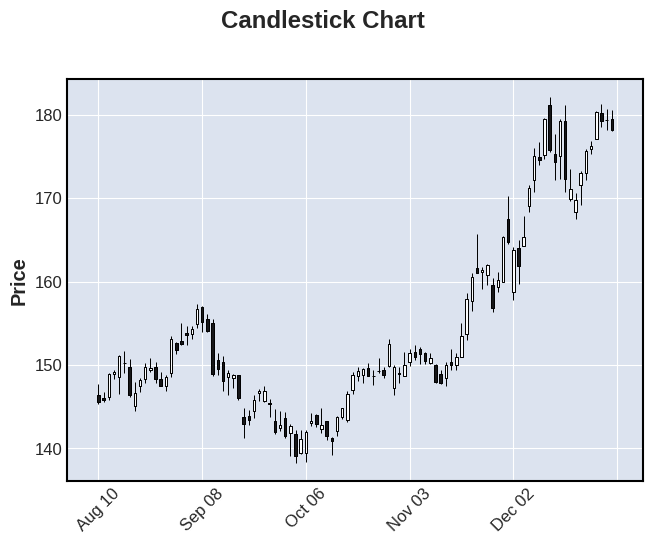

In [82]:
import mplfinance as mpf
mpf.plot(data.iloc[-100:], type='candle', title='Candlestick Chart', ylabel='Price')

In [83]:
import plotly.express as px

# Create interactive line chart
fig = px.line(data, x=data.index, y='Close', title='Closing Prices')
fig.show()

In [84]:
data_cdl = data.reset_index()

In [85]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

candlestick = go.Candlestick(
    x=data_cdl['Date'],
    open=data_cdl['Open'],
    high=data_cdl['High'],
    low=data_cdl['Low'],
    close=data_cdl['Close'],
    name='Candlestick'
)

# Create volume trace
volume = go.Bar(
    x=data_cdl['Date'],
    y=data_cdl['Volume'],
    name='Volume',
    marker_color='rgba(26, 118, 255, 0.5)'
)

# Create moving average trace
moving_avg1 = go.Scatter(
    x=data_cdl['Date'],
    y=data_cdl['MA50'],
    name='Moving Average (50)',
    line=dict(color='orange')
)


# Create moving average trace
moving_avg2 = go.Scatter(
    x=data_cdl['Date'],
    y=data_cdl['MA200'],
    name='Moving Average (200)',
    line=dict(color='orange')
)

# Create RSI trace
rsi_trace = go.Scatter(
    x=data_cdl['Date'],
    y=data_cdl['RSI14'],
    name='RSI (14)',
    line=dict(color='purple')
)

# Create figure
fig = go.Figure(data=[candlestick, volume, moving_avg1,moving_avg2, rsi_trace])

# Update layout
fig.update_layout(
    title='Candlestick Chart with Volume, Moving Average, and RSI',
    xaxis_rangeslider_visible=False,
    yaxis=dict(
        title='Price',
        side='right',
        overlaying='y'
    ),
    yaxis2=dict(
        title='Volume',
        side='left',
        overlaying='y',
        showgrid=False
    )
)

# Show the figure
fig.show()


## Section 4 : Building Dashboards:

1. Introduction to dashboarding libraries (e.g., Dash, Streamlit)
2. Designing interactive dashboards for financial analysis
3. Incorporating visualizations, tables, and interactive components
4. Adding user interactivity (e.g., dropdowns, sliders)
5. Connecting data sources to dashboards
6. Deploying and sharing dashboards


Here are some goods books :-
1. Infographics: The Power of Visual Storytelling
2. Storytelling with Data: A Data Visualization Guide for Business Professionals
3. Information Dashboard Design: The Effective Visual Communication of Data
4. The Big Book of Dashboards: Visualizing Your Data Using Real-World Business Scenarios